Ronaldlee Ejalu

CSC_578_901_1090

CSC 578 HW#4

In [ ]:
# Code piece to mount my Google Drive
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# See the list of files in this local folder (the example here is 'Temp')
!ls -l '/content/drive/MyDrive/CSC578/Tutorials'

total 127
drwx------ 2 root root  4096 Apr 26 15:21 epic_num_reader.model
drwx------ 2 root root  4096 Apr 29 15:03 logs
-rw------- 1 root root 30999 May  3 04:37 TensorFlow_Keras_lab.ipynb
-rw------- 1 root root 28629 Apr 29 14:50 test.csv
-rw------- 1 root root 61194 Apr 29 14:32 train.csv


In [ ]:
# Change the working directory to hw3
import os
os.chdir('/content/drive/MyDrive/CSC578/Tutorials')

In [ ]:
from tensorflow.keras.regularizers import l1_l2, l1, l2
import tensorflow as tf
!pip install ipython-autotime
tf.__version__

'2.8.0'

In [ ]:
%load_ext autotime

time: 85.6 µs (started: 2022-05-03 04:37:50 +00:00)


In [ ]:
mnist = tf.keras.datasets.mnist # 28 * 28 images of hand-written digits 0-0
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step
time: 549 ms (started: 2022-05-03 04:37:50 +00:00)


In [ ]:
X_train.shape

(60000, 28, 28)

time: 5.03 ms (started: 2022-05-03 04:37:51 +00:00)


In [ ]:
type(X_train)

numpy.ndarray

time: 3.04 ms (started: 2022-05-03 04:37:51 +00:00)


In [ ]:
type(X_test)

numpy.ndarray

time: 2.61 ms (started: 2022-05-03 04:37:51 +00:00)


In [ ]:
type(y_train)

numpy.ndarray

time: 2.01 ms (started: 2022-05-03 04:37:51 +00:00)


In [ ]:
type(y_test)

numpy.ndarray

time: 4.36 ms (started: 2022-05-03 04:37:51 +00:00)


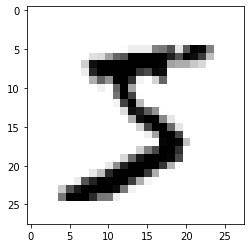

time: 214 ms (started: 2022-05-03 04:37:51 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
# we need to normalize the data
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

time: 545 ms (started: 2022-05-03 04:37:51 +00:00)


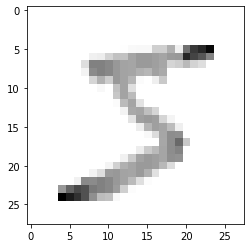

time: 160 ms (started: 2022-05-03 04:37:52 +00:00)


In [ ]:
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
X_train[0]
# we see the data is now normalized

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

time: 17.7 ms (started: 2022-05-03 04:37:52 +00:00)


In [ ]:
# build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # first hidden layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # second hidden layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # this is like a probability distribution and that is why we are using softmax


# here we defined the architecture of the above model

model.compile(optimizer='adam'
              , loss='sparse_categorical_crossentropy'
              , metrics=['accuracy']
              )
model.fit(X_train, y_train, epochs=3)
# here we can see how accuracy is increasing. 
# we got 97.72% after 3 epochs

Epoch 1/3
1875/1875 [==============================] - 11s 4ms/step - loss: 0.2581 - accuracy: 0.9247
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1057 - accuracy: 0.9675
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0748 - accuracy: 0.9765


time: 25 s (started: 2022-05-03 04:37:52 +00:00)


In [ ]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0908 - accuracy: 0.9715
0.09075158089399338 0.9714999794960022
time: 976 ms (started: 2022-05-03 04:38:17 +00:00)


In [ ]:
# saving your model
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model/assets
time: 1.61 s (started: 2022-05-03 04:38:18 +00:00)


In [ ]:
# loading the saved model
new_model = tf.keras.models.load_model('epic_num_reader.model')

time: 272 ms (started: 2022-05-03 04:38:19 +00:00)


In [ ]:
# if you want to make a prediction
# prediction always takes a list
predictions = new_model.predict([X_test])
print(predictions) # it prints the probability distributions


[[8.3743942e-08 2.2871625e-08 1.6511114e-05 ... 9.9987757e-01
  3.4979852e-08 4.9620780e-07]
 [2.4205005e-07 1.2341023e-03 9.9851722e-01 ... 2.6380808e-06
  1.8732089e-06 2.9605610e-11]
 [6.4746636e-08 9.9989486e-01 4.9506848e-06 ... 4.0482471e-05
  2.4815474e-05 2.3632117e-07]
 ...
 [3.0125182e-08 4.0067056e-07 4.2480135e-09 ... 4.8628724e-05
  2.2521498e-07 6.2077533e-04]
 [6.9381040e-06 3.2603289e-06 6.2541739e-07 ... 1.3943144e-06
  2.0312101e-03 5.8340333e-08]
 [1.2417369e-06 1.1020083e-09 3.0439459e-08 ... 1.6238323e-10
  1.7605553e-08 5.7994498e-10]]
time: 562 ms (started: 2022-05-03 04:38:20 +00:00)


In [ ]:
import numpy as np
print(np.argmax(predictions[0]))
# here the prediction for X_test zero like the 0th index is a 7

7
time: 1.03 ms (started: 2022-05-03 04:38:20 +00:00)


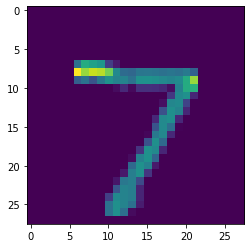

time: 126 ms (started: 2022-05-03 04:38:20 +00:00)


In [ ]:
# to confirm that
plt.imshow(X_test[0])
plt.show()

# Helper functions

In [ ]:
def derivePlot(histDict):
  """A function that accepts a dictionary and plots the Train Vs Validation loss, and Train vs.Validation mean squared logarithmic error"""
  plt.figure(figsize=(10, 7))
  line_mse = plt.plot(range(0,EPOCHS), histDict['loss'], 'r')
  line_crossEntropy = plt.plot(range(0,EPOCHS), histDict['val_loss'], '#cdc50a')
  plt.title('Train vs. Validation: loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'])
  
  plt.figure(figsize=(10, 7))
  line_mse = plt.plot(range(0,EPOCHS), histDict['accuracy'], 'r')
  line_crossEntropy = plt.plot(range(0,EPOCHS), histDict['val_accuracy'], '#cdc50a')
  plt.title('Train vs. Validation: Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'])
  plt.show()


time: 8.26 ms (started: 2022-05-03 04:38:20 +00:00)


In [ ]:
def generateModel_m(EPOCHS=30, BATCHSIZE=1):
  """Function that returns a Keras model"""
  # msle=tf.keras.losses.MeanSquaredLogarithmicError()

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten()) # input layer
  model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # first hidden layer
  model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # second hidden layer
  model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # this is like a probability distribution and that is why we are using softmax
  
  # here we defined the architecture of the above model
  model.compile(optimizer='adam'
              , loss='sparse_categorical_crossentropy'
              , metrics=['accuracy']
              )
  
  # let's fit the model using a 20% validation
  resultsL = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCHSIZE, validation_split=0.2)

  return resultsL

time: 10.7 ms (started: 2022-05-03 04:38:20 +00:00)


In [ ]:
def generate_Model(EPOCHS=30, BATCHSIZE=100, e_t_a=0.25):
  """Function that returns a Keras model"""
  #msle=tf.keras.losses.MeanSquaredLogarithmicError()

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten()) # input layer
  model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # first hidden layer
  model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # second hidden layer
  model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # this is like a probability distribution and that is why we are using softmax


  # here we defined the architecture of the above model
  opt = tf.keras.optimizers.Adam(learning_rate=e_t_a)
  model.compile(optimizer=opt
              , loss='sparse_categorical_crossentropy'
              , metrics=['accuracy']
              )
  
  # let's fit the model using a 20% validation
  resultsL = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCHSIZE, validation_split=0.2)

  return resultsL

time: 8.48 ms (started: 2022-05-03 04:38:20 +00:00)


In [ ]:
def generateModel_d(epoch, fact, e_t_a):
  #msle=tf.keras.losses.MeanSquaredLogarithmicError()

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten()) # input layer
  model.add(tf.keras.layers.Dense(128, kernel_regularizer=l2(fact), activation=tf.nn.relu)) # first hidden layer
  model.add(tf.keras.layers.Dense(128, kernel_regularizer=l2(fact), activation=tf.nn.relu)) # second hidden layer
  model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # this is like a probability distribution and that is why we are using softmax
  # e_t_a = 0.002
  opt = tf.keras.optimizers.Adam(learning_rate=e_t_a)
  model.compile(optimizer=opt
              , loss='sparse_categorical_crossentropy'
              , metrics=['accuracy']
              )
  # let's fit the model using a 20% validation
  resultsL = model.fit(X_train, y_train, epochs=epoch, batch_size=64, validation_split=0.2)

  return resultsL

time: 9.54 ms (started: 2022-05-03 04:38:20 +00:00)


In [ ]:
def generateModel(fact, e_t_a, dropout_rate):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten()) # input layer
  model.add(tf.keras.layers.Dense(128, kernel_regularizer=l2(fact), activation=tf.nn.relu)) # first hidden layer
  model.add(tf.keras.layers.Dense(128, kernel_regularizer=l2(fact), activation=tf.nn.relu)) # second hidden layer
  model.add(tf.keras.layers.Dropout(rate=dropout_rate))
  model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # this is like a probability distribution and that is why we are using softmax
  opt = tf.keras.optimizers.Adam(learning_rate=e_t_a)
  model.compile(optimizer=opt
              , loss='sparse_categorical_crossentropy'
              , metrics=['accuracy']
              )
  # let's fit the model using a 20% validation
  resultsL = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=64, validation_split=0.2)

  return resultsL

time: 8.9 ms (started: 2022-05-03 04:38:20 +00:00)


# 4.3

In [ ]:
EPOCHS = 30

time: 665 µs (started: 2022-05-03 04:38:20 +00:00)


# Mini-batch size

We are going to experiment with different values of 5, 15, 25, 32 and 64

## mini_batch size = 5


In [ ]:
#import tensorflow as tf
# from tensorflow.keras.losses import MeanSquaredLogarithmicError

time: 661 µs (started: 2022-05-03 04:38:20 +00:00)


In [ ]:
BATCHSIZE=5

time: 667 µs (started: 2022-05-03 04:38:20 +00:00)


In [ ]:
resultsL_mbs = generateModel_m(EPOCHS, BATCHSIZE)

Epoch 1/30
9600/9600 [==============================] - 26s 3ms/step - loss: 0.2247 - accuracy: 0.9322 - val_loss: 0.1286 - val_accuracy: 0.9616
Epoch 2/30
9600/9600 [==============================] - 23s 2ms/step - loss: 0.1010 - accuracy: 0.9692 - val_loss: 0.1350 - val_accuracy: 0.9608
Epoch 3/30
9600/9600 [==============================] - 24s 3ms/step - loss: 0.0738 - accuracy: 0.9766 - val_loss: 0.1126 - val_accuracy: 0.9699
Epoch 4/30
9600/9600 [==============================] - 23s 2ms/step - loss: 0.0556 - accuracy: 0.9826 - val_loss: 0.1152 - val_accuracy: 0.9703
Epoch 5/30
9600/9600 [==============================] - 25s 3ms/step - loss: 0.0447 - accuracy: 0.9859 - val_loss: 0.1133 - val_accuracy: 0.9697
Epoch 6/30
9600/9600 [==============================] - 23s 2ms/step - loss: 0.0367 - accuracy: 0.9881 - val_loss: 0.1219 - val_accuracy: 0.9722
Epoch 7/30
9600/9600 [==============================] - 23s 2ms/step - loss: 0.0337 - accuracy: 0.9892 - val_loss: 0.1430 - val_ac

In [ ]:
# model.fit() returns a History object that contains a dictionary with everything that happened during training. 
histDict = resultsL_mbs.history

time: 1.12 ms (started: 2022-05-03 04:50:43 +00:00)


In [ ]:
histDict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

time: 4 ms (started: 2022-05-03 04:50:43 +00:00)


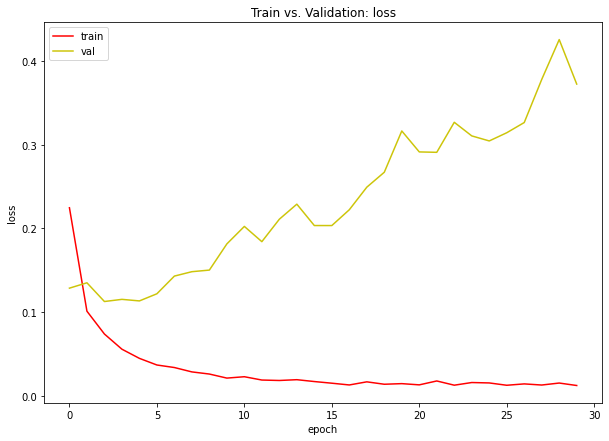

time: 168 ms (started: 2022-05-03 04:50:43 +00:00)


In [ ]:
plt.figure(figsize=(10, 7))
line_mse = plt.plot(range(0,EPOCHS), histDict['loss'], 'r')
line_crossEntropy = plt.plot(range(0,EPOCHS), histDict['val_loss'], '#cdc50a')
plt.title('Train vs. Validation: loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
histDict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

time: 3.95 ms (started: 2022-05-03 04:50:43 +00:00)


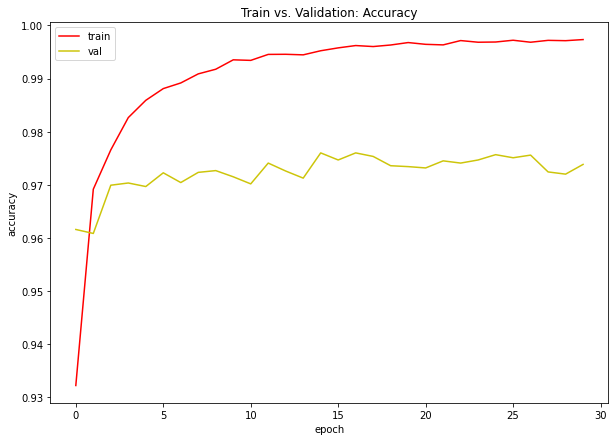

time: 368 ms (started: 2022-05-03 04:50:43 +00:00)


In [ ]:
plt.figure(figsize=(10, 7))
line_mse = plt.plot(range(0,EPOCHS), histDict['accuracy'], 'r')
line_crossEntropy = plt.plot(range(0,EPOCHS), histDict['val_accuracy'], '#cdc50a')
plt.title('Train vs. Validation: Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

## min_batch_size = 15

In [ ]:
BATCHSIZE=15

time: 1.05 ms (started: 2022-05-03 04:50:44 +00:00)


In [ ]:
resultsL_mbs_15 = generateModel_m(EPOCHS, BATCHSIZE)

Epoch 1/30
3200/3200 [==============================] - 8s 2ms/step - loss: 0.2553 - accuracy: 0.9243 - val_loss: 0.1303 - val_accuracy: 0.9617
Epoch 2/30
3200/3200 [==============================] - 8s 2ms/step - loss: 0.1076 - accuracy: 0.9668 - val_loss: 0.1038 - val_accuracy: 0.9692
Epoch 3/30
3200/3200 [==============================] - 8s 2ms/step - loss: 0.0730 - accuracy: 0.9769 - val_loss: 0.1227 - val_accuracy: 0.9661
Epoch 4/30
3200/3200 [==============================] - 8s 2ms/step - loss: 0.0541 - accuracy: 0.9823 - val_loss: 0.1015 - val_accuracy: 0.9722
Epoch 5/30
3200/3200 [==============================] - 8s 2ms/step - loss: 0.0408 - accuracy: 0.9866 - val_loss: 0.1067 - val_accuracy: 0.9717
Epoch 6/30
3200/3200 [==============================] - 8s 2ms/step - loss: 0.0319 - accuracy: 0.9900 - val_loss: 0.1173 - val_accuracy: 0.9703
Epoch 7/30
3200/3200 [==============================] - 8s 2ms/step - loss: 0.0263 - accuracy: 0.9913 - val_loss: 0.1124 - val_accuracy:

In [ ]:
histDict = resultsL_mbs_15.history

time: 2.12 ms (started: 2022-05-03 04:54:41 +00:00)


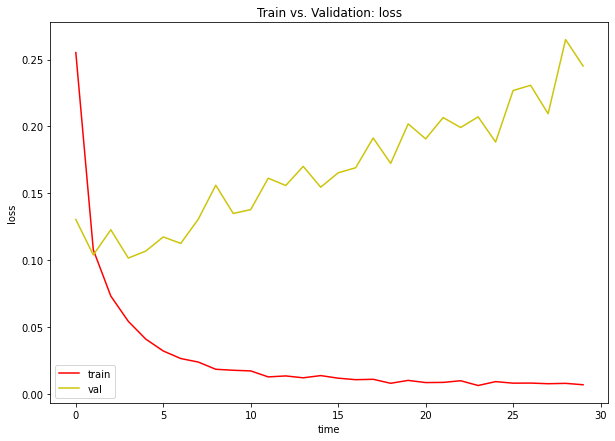

time: 179 ms (started: 2022-05-03 04:54:41 +00:00)


In [ ]:
plt.figure(figsize=(10, 7))
line_mse = plt.plot(range(0,EPOCHS), histDict['loss'], 'r')
line_crossEntropy = plt.plot(range(0,EPOCHS), histDict['val_loss'], '#cdc50a')
plt.title('Train vs. Validation: loss')
plt.ylabel('loss')
plt.xlabel('time')
plt.legend(['train', 'val'])
plt.show()

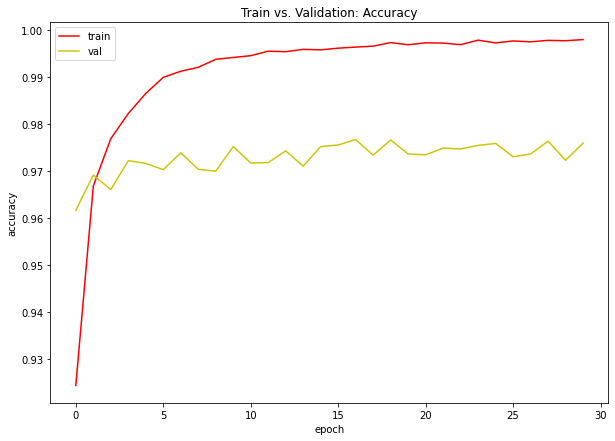

time: 180 ms (started: 2022-05-03 04:54:42 +00:00)


In [ ]:
plt.figure(figsize=(10, 7))
line_mse = plt.plot(range(0,EPOCHS), histDict['accuracy'], 'r')
line_crossEntropy = plt.plot(range(0,EPOCHS), histDict['val_accuracy'], '#cdc50a')
plt.title('Train vs. Validation: Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

## mini_batch_size = 25

In [ ]:
BATCHSIZE=25

time: 608 µs (started: 2022-05-03 04:54:42 +00:00)


In [ ]:
# let's fit the model using a 20% validation
resultsL_mbs_25 = generateModel_m(EPOCHS, BATCHSIZE)

Epoch 1/30
1920/1920 [==============================] - 6s 3ms/step - loss: 0.2779 - accuracy: 0.9193 - val_loss: 0.1601 - val_accuracy: 0.9516
Epoch 2/30
1920/1920 [==============================] - 5s 3ms/step - loss: 0.1156 - accuracy: 0.9653 - val_loss: 0.1163 - val_accuracy: 0.9653
Epoch 3/30
1920/1920 [==============================] - 5s 3ms/step - loss: 0.0791 - accuracy: 0.9759 - val_loss: 0.1228 - val_accuracy: 0.9640
Epoch 4/30
1920/1920 [==============================] - 6s 3ms/step - loss: 0.0578 - accuracy: 0.9814 - val_loss: 0.1094 - val_accuracy: 0.9686
Epoch 5/30
1920/1920 [==============================] - 5s 3ms/step - loss: 0.0422 - accuracy: 0.9857 - val_loss: 0.1149 - val_accuracy: 0.9692
Epoch 6/30
1920/1920 [==============================] - 5s 3ms/step - loss: 0.0334 - accuracy: 0.9891 - val_loss: 0.1116 - val_accuracy: 0.9698
Epoch 7/30
1920/1920 [==============================] - 5s 3ms/step - loss: 0.0256 - accuracy: 0.9912 - val_loss: 0.1240 - val_accuracy:

In [ ]:
histDict = resultsL_mbs_25.history

time: 1.05 ms (started: 2022-05-03 04:58:04 +00:00)


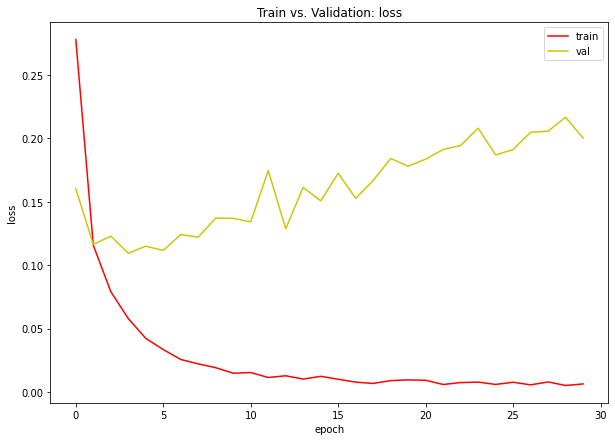

time: 211 ms (started: 2022-05-03 04:58:04 +00:00)


In [ ]:
plt.figure(figsize=(10, 7))
line_mse = plt.plot(range(0,EPOCHS), histDict['loss'], 'r')
line_crossEntropy = plt.plot(range(0,EPOCHS), histDict['val_loss'], '#cdc50a')
plt.title('Train vs. Validation: loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

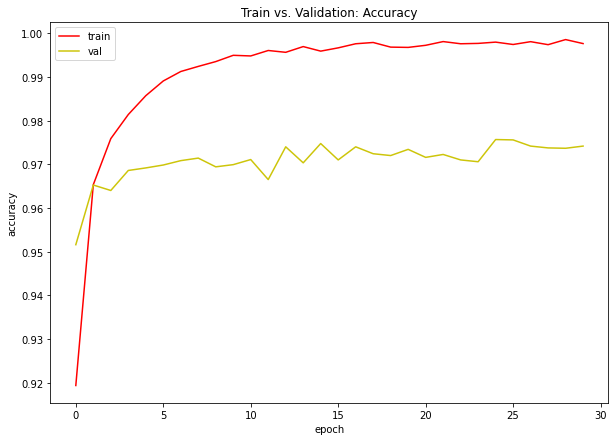

time: 199 ms (started: 2022-05-03 04:58:04 +00:00)


In [ ]:
plt.figure(figsize=(10, 7))
line_mse = plt.plot(range(0,EPOCHS), histDict['accuracy'], 'r')
line_crossEntropy = plt.plot(range(0,EPOCHS), histDict['val_accuracy'], '#cdc50a')
plt.title('Train vs. Validation: Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

## min_batch_size = 32

In [ ]:
BATCHSIZE=32

time: 1.02 ms (started: 2022-05-03 04:58:05 +00:00)


In [ ]:
# let's fit the model using a 20% validation
resultsL_mbs_32 = generateModel_m(EPOCHS, BATCHSIZE)

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2876 - accuracy: 0.9164 - val_loss: 0.1402 - val_accuracy: 0.9580
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1162 - accuracy: 0.9646 - val_loss: 0.1096 - val_accuracy: 0.9667
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0781 - accuracy: 0.9748 - val_loss: 0.1136 - val_accuracy: 0.9657
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0560 - accuracy: 0.9821 - val_loss: 0.1045 - val_accuracy: 0.9688
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0427 - accuracy: 0.9863 - val_loss: 0.1059 - val_accuracy: 0.9700
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0340 - accuracy: 0.9886 - val_loss: 0.0966 - val_accuracy: 0.9737
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0249 - accuracy: 0.9919 - val_loss: 0.1120 - val_accuracy:

In [ ]:
histDict = resultsL_mbs_32.history

time: 697 µs (started: 2022-05-03 05:00:27 +00:00)


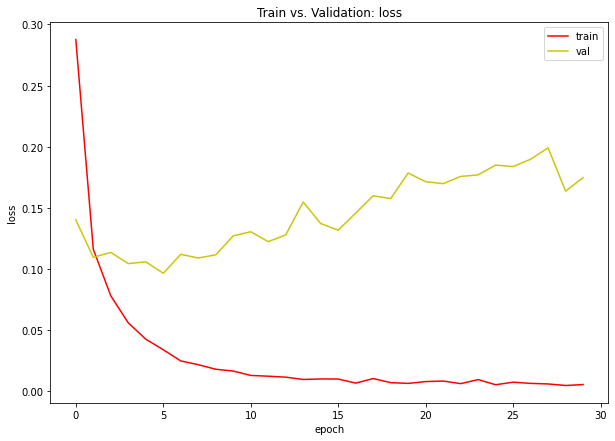

time: 185 ms (started: 2022-05-03 05:00:27 +00:00)


In [ ]:
plt.figure(figsize=(10, 7))
line_mse = plt.plot(range(0,EPOCHS), histDict['loss'], 'r')
line_crossEntropy = plt.plot(range(0,EPOCHS), histDict['val_loss'], '#cdc50a')
plt.title('Train vs. Validation: loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

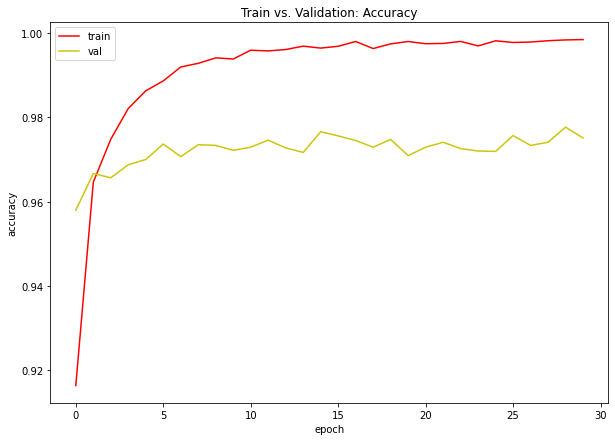

time: 166 ms (started: 2022-05-03 05:00:27 +00:00)


In [ ]:
plt.figure(figsize=(10, 7))
line_mse = plt.plot(range(0,EPOCHS), histDict['accuracy'], 'r')
line_crossEntropy = plt.plot(range(0,EPOCHS), histDict['val_accuracy'], '#cdc50a')
plt.title('Train vs. Validation: Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

## mini_batch_size = 64

In [ ]:
BATCHSIZE=64

time: 603 µs (started: 2022-05-03 05:00:28 +00:00)


In [ ]:
resultsL_mbs_64 = generateModel_m(EPOCHS, BATCHSIZE)

Epoch 1/30
750/750 [==============================] - 3s 4ms/step - loss: 0.3420 - accuracy: 0.9018 - val_loss: 0.1842 - val_accuracy: 0.9456
Epoch 2/30
750/750 [==============================] - 2s 3ms/step - loss: 0.1453 - accuracy: 0.9563 - val_loss: 0.1360 - val_accuracy: 0.9603
Epoch 3/30
750/750 [==============================] - 2s 3ms/step - loss: 0.0997 - accuracy: 0.9693 - val_loss: 0.1146 - val_accuracy: 0.9641
Epoch 4/30
750/750 [==============================] - 2s 3ms/step - loss: 0.0716 - accuracy: 0.9777 - val_loss: 0.1076 - val_accuracy: 0.9666
Epoch 5/30
750/750 [==============================] - 2s 3ms/step - loss: 0.0557 - accuracy: 0.9823 - val_loss: 0.0966 - val_accuracy: 0.9717
Epoch 6/30
750/750 [==============================] - 2s 3ms/step - loss: 0.0435 - accuracy: 0.9859 - val_loss: 0.0960 - val_accuracy: 0.9717
Epoch 7/30
750/750 [==============================] - 2s 3ms/step - loss: 0.0333 - accuracy: 0.9895 - val_loss: 0.1070 - val_accuracy: 0.9702
Epoch 

In [ ]:
histDict = resultsL_mbs_64.history

time: 711 µs (started: 2022-05-03 05:01:50 +00:00)


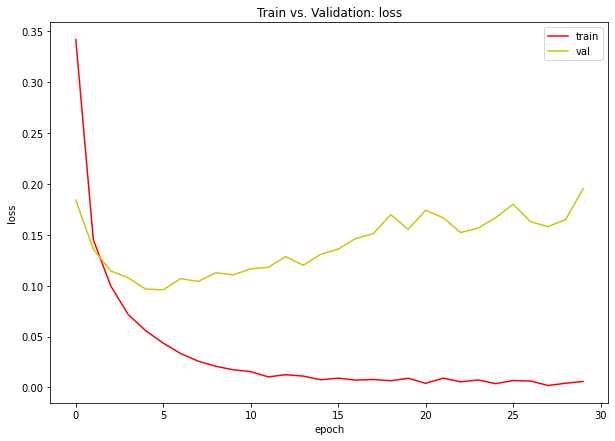

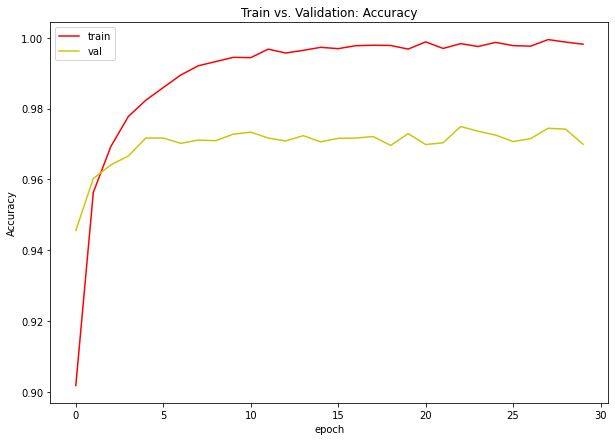

time: 368 ms (started: 2022-05-03 05:01:50 +00:00)


In [ ]:
# helper function that derives the Train Vs. Validation line charts
derivePlot(histDict)

## mini_batch_size = 100

In [ ]:
BATCHSIZE=100

time: 1.05 ms (started: 2022-05-03 05:01:50 +00:00)


In [ ]:
resultsL_mbs_100 = generateModel_m(EPOCHS, BATCHSIZE)

Epoch 1/30
480/480 [==============================] - 2s 3ms/step - loss: 0.3969 - accuracy: 0.8895 - val_loss: 0.2002 - val_accuracy: 0.9425
Epoch 2/30
480/480 [==============================] - 1s 3ms/step - loss: 0.1682 - accuracy: 0.9506 - val_loss: 0.1472 - val_accuracy: 0.9571
Epoch 3/30
480/480 [==============================] - 1s 3ms/step - loss: 0.1158 - accuracy: 0.9652 - val_loss: 0.1219 - val_accuracy: 0.9643
Epoch 4/30
480/480 [==============================] - 1s 3ms/step - loss: 0.0872 - accuracy: 0.9736 - val_loss: 0.1125 - val_accuracy: 0.9678
Epoch 5/30
480/480 [==============================] - 1s 3ms/step - loss: 0.0684 - accuracy: 0.9793 - val_loss: 0.1007 - val_accuracy: 0.9703
Epoch 6/30
480/480 [==============================] - 1s 3ms/step - loss: 0.0514 - accuracy: 0.9845 - val_loss: 0.1064 - val_accuracy: 0.9670
Epoch 7/30
480/480 [==============================] - 1s 3ms/step - loss: 0.0411 - accuracy: 0.9878 - val_loss: 0.1035 - val_accuracy: 0.9718
Epoch 

In [ ]:
histDict = resultsL_mbs_100.history

time: 738 µs (started: 2022-05-03 05:03:13 +00:00)


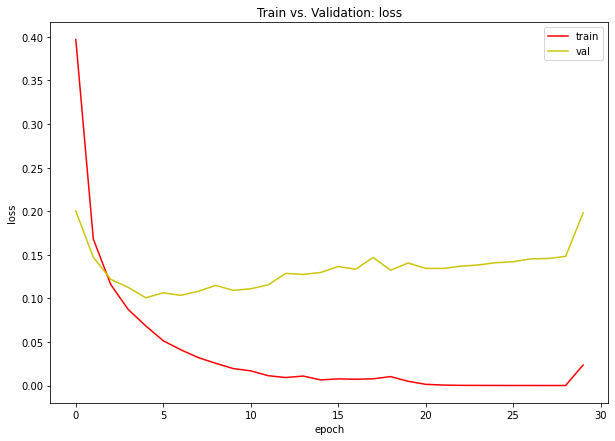

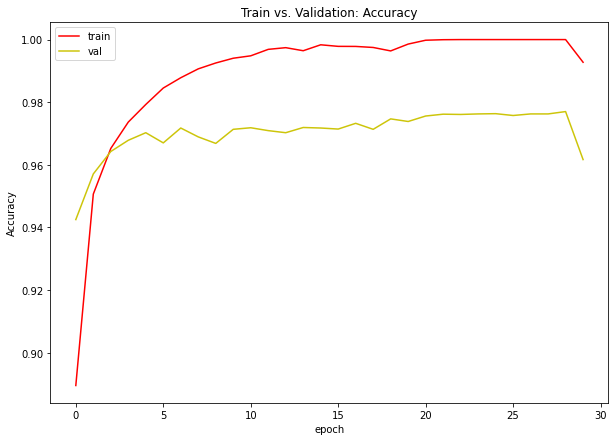

time: 350 ms (started: 2022-05-03 05:03:13 +00:00)


In [ ]:
# helper function that derives the Train Vs. Validation line charts
derivePlot(histDict)

# learning rate

## learning rate = 0.5

In [ ]:
# learning rate = 0.5
e_t_a = 0.5

time: 653 µs (started: 2022-05-03 05:03:13 +00:00)


In [ ]:
# let's fit the model using a 20% validation
resultsL_5 = generateModel(EPOCHS, 64, e_t_a)

Epoch 1/30
750/750 [==============================] - 4s 4ms/step - loss: 139300544.0000 - accuracy: 0.0979 - val_loss: 38.9597 - val_accuracy: 0.0997
Epoch 2/30
750/750 [==============================] - 2s 3ms/step - loss: 126192.1094 - accuracy: 0.0975 - val_loss: 411851.6875 - val_accuracy: 0.0975
Epoch 3/30
750/750 [==============================] - 3s 4ms/step - loss: 6344985.5000 - accuracy: 0.0998 - val_loss: 3259859.0000 - val_accuracy: 0.0975
Epoch 4/30
750/750 [==============================] - 2s 3ms/step - loss: 743841.2500 - accuracy: 0.1007 - val_loss: 1084066.5000 - val_accuracy: 0.0914
Epoch 5/30
750/750 [==============================] - 2s 3ms/step - loss: 4177205.5000 - accuracy: 0.0998 - val_loss: 691012.2500 - val_accuracy: 0.0956
Epoch 6/30
750/750 [==============================] - 2s 3ms/step - loss: 3395110.5000 - accuracy: 0.1005 - val_loss: 675493.7500 - val_accuracy: 0.1081
Epoch 7/30
750/750 [==============================] - 2s 3ms/step - loss: 2981316.50

In [ ]:
histDict = resultsL_5.history

time: 689 µs (started: 2022-05-03 05:04:36 +00:00)


In [ ]:
histDict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

time: 2.25 ms (started: 2022-05-03 05:04:36 +00:00)


We have four entries: one for each monitored metric during training and validation. The training and validation loss graphs plus the training and validation graphs will be derived using these entries.

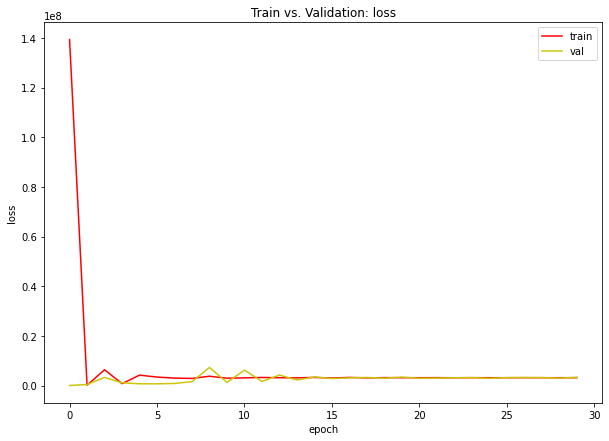

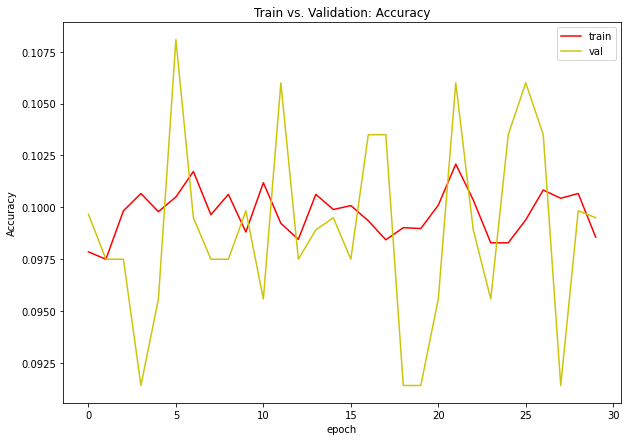

time: 358 ms (started: 2022-05-03 05:04:36 +00:00)


In [ ]:
# helper function that derives the Train Vs. Validation line charts
derivePlot(histDict)

## learning rate = 0.25

In [ ]:
e_t_a = 0.25

time: 9.28 ms (started: 2022-05-03 05:04:36 +00:00)


In [ ]:
# let's fit the model using a 20% validation
resultsL_25 = generateModel(EPOCHS, 64, e_t_a)

Epoch 1/30
750/750 [==============================] - 3s 4ms/step - loss: 151710080.0000 - accuracy: 0.0991 - val_loss: 1196.4496 - val_accuracy: 0.0997
Epoch 2/30
750/750 [==============================] - 3s 3ms/step - loss: 99960.5000 - accuracy: 0.1009 - val_loss: 376469.5000 - val_accuracy: 0.0914
Epoch 3/30
750/750 [==============================] - 2s 3ms/step - loss: 6123858.0000 - accuracy: 0.1005 - val_loss: 3103617.7500 - val_accuracy: 0.0956
Epoch 4/30
750/750 [==============================] - 3s 3ms/step - loss: 608490.4375 - accuracy: 0.1003 - val_loss: 1014426.6875 - val_accuracy: 0.0995
Epoch 5/30
750/750 [==============================] - 3s 3ms/step - loss: 4028351.7500 - accuracy: 0.1018 - val_loss: 487721.0938 - val_accuracy: 0.0914
Epoch 6/30
750/750 [==============================] - 3s 4ms/step - loss: 3245996.7500 - accuracy: 0.0987 - val_loss: 615237.5000 - val_accuracy: 0.0989
Epoch 7/30
750/750 [==============================] - 3s 3ms/step - loss: 2845998.2

In [ ]:
histDict = resultsL_25.history

time: 2.04 ms (started: 2022-05-03 05:05:59 +00:00)


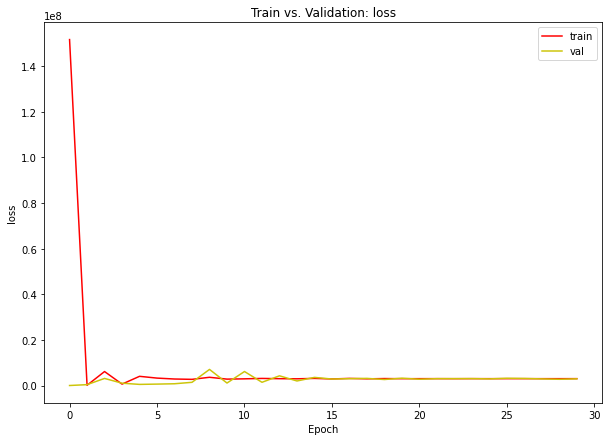

time: 179 ms (started: 2022-05-03 05:05:59 +00:00)


In [ ]:
plt.figure(figsize=(10, 7))
line_mse = plt.plot(range(0,EPOCHS), histDict['loss'], 'r')
line_crossEntropy = plt.plot(range(0,EPOCHS), histDict['val_loss'], '#cdc50a')
plt.title('Train vs. Validation: loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

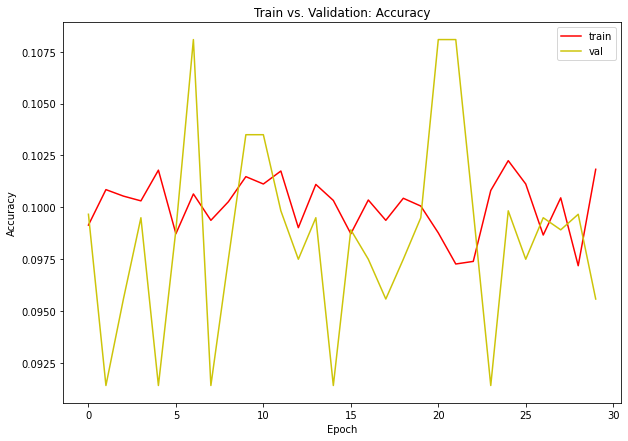

time: 181 ms (started: 2022-05-03 05:05:59 +00:00)


In [ ]:
plt.figure(figsize=(10, 7))
line_mse = plt.plot(range(0,EPOCHS), histDict['accuracy'], 'r')
line_crossEntropy = plt.plot(range(0,EPOCHS), histDict['val_accuracy'], '#cdc50a')
plt.title('Train vs. Validation: Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

## learning rate = 0.025

In [ ]:
e_t_a = 0.025

time: 907 µs (started: 2022-05-03 05:05:59 +00:00)


In [ ]:
# let's fit the model using a 20% validation
resultsL_0_25 = generateModel(EPOCHS, 64, e_t_a)

Epoch 1/30
750/750 [==============================] - 3s 3ms/step - loss: 151674064.0000 - accuracy: 0.0984 - val_loss: 30.8747 - val_accuracy: 0.0989
Epoch 2/30
750/750 [==============================] - 3s 4ms/step - loss: 73159.8984 - accuracy: 0.1016 - val_loss: 359131.3125 - val_accuracy: 0.1081
Epoch 3/30
750/750 [==============================] - 2s 3ms/step - loss: 6289354.0000 - accuracy: 0.1002 - val_loss: 3551856.0000 - val_accuracy: 0.0956
Epoch 4/30
750/750 [==============================] - 3s 4ms/step - loss: 620746.1875 - accuracy: 0.1016 - val_loss: 950476.1250 - val_accuracy: 0.0997
Epoch 5/30
750/750 [==============================] - 2s 3ms/step - loss: 4156578.2500 - accuracy: 0.1001 - val_loss: 554991.6875 - val_accuracy: 0.0956
Epoch 6/30
750/750 [==============================] - 2s 3ms/step - loss: 3336106.2500 - accuracy: 0.0981 - val_loss: 697901.7500 - val_accuracy: 0.1060
Epoch 7/30
750/750 [==============================] - 3s 4ms/step - loss: 2913730.5000

In [ ]:
histDict = resultsL_0_25.history

time: 772 µs (started: 2022-05-03 05:07:15 +00:00)


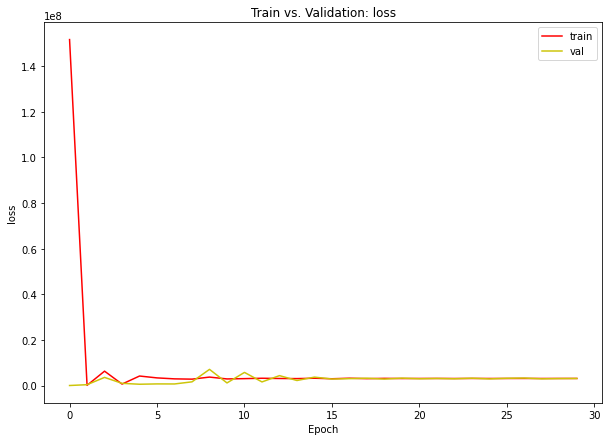

time: 188 ms (started: 2022-05-03 05:07:15 +00:00)


In [ ]:
plt.figure(figsize=(10, 7))
line_mse = plt.plot(range(0,EPOCHS), histDict['loss'], 'r')
line_crossEntropy = plt.plot(range(0,EPOCHS), histDict['val_loss'], '#cdc50a')
plt.title('Train vs. Validation: loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

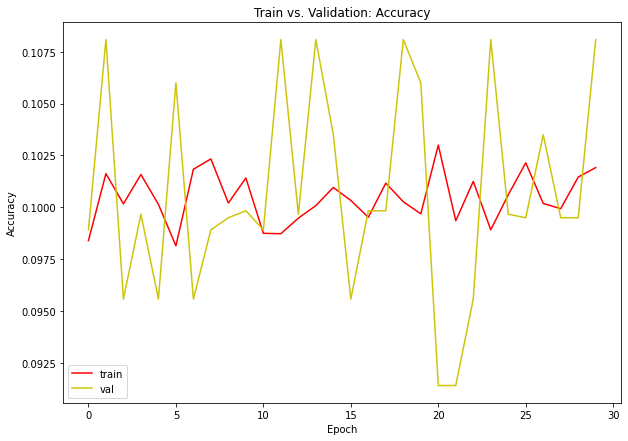

time: 178 ms (started: 2022-05-03 05:07:15 +00:00)


In [ ]:
plt.figure(figsize=(10, 7))
line_mse = plt.plot(range(0,EPOCHS), histDict['accuracy'], 'r')
line_crossEntropy = plt.plot(range(0,EPOCHS), histDict['val_accuracy'], '#cdc50a')
plt.title('Train vs. Validation: Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

# Regularization

## lambda = 1

In [ ]:
fact=1

time: 870 µs (started: 2022-05-03 05:07:15 +00:00)


In [ ]:
# let's fit the model using a 20% validation
resultsL_r_10 = generateModel_d(EPOCHS, fact, 0.025)

Epoch 1/30
750/750 [==============================] - 3s 3ms/step - loss: 3.9647 - accuracy: 0.1102 - val_loss: 2.3080 - val_accuracy: 0.1060
Epoch 2/30
750/750 [==============================] - 2s 3ms/step - loss: 2.3119 - accuracy: 0.1081 - val_loss: 2.3298 - val_accuracy: 0.1060
Epoch 3/30
750/750 [==============================] - 2s 3ms/step - loss: 2.3263 - accuracy: 0.1090 - val_loss: 2.3242 - val_accuracy: 0.1081
Epoch 4/30
750/750 [==============================] - 2s 3ms/step - loss: 2.3297 - accuracy: 0.1102 - val_loss: 2.3378 - val_accuracy: 0.1060
Epoch 5/30
750/750 [==============================] - 2s 3ms/step - loss: 2.3352 - accuracy: 0.1100 - val_loss: 2.3402 - val_accuracy: 0.1060
Epoch 6/30
750/750 [==============================] - 2s 3ms/step - loss: 2.3336 - accuracy: 0.1107 - val_loss: 2.3387 - val_accuracy: 0.1060
Epoch 7/30
750/750 [==============================] - 3s 3ms/step - loss: 2.3331 - accuracy: 0.1088 - val_loss: 2.3340 - val_accuracy: 0.1060
Epoch 

In [ ]:
histDict = resultsL_r_10.history

time: 708 µs (started: 2022-05-03 05:08:38 +00:00)


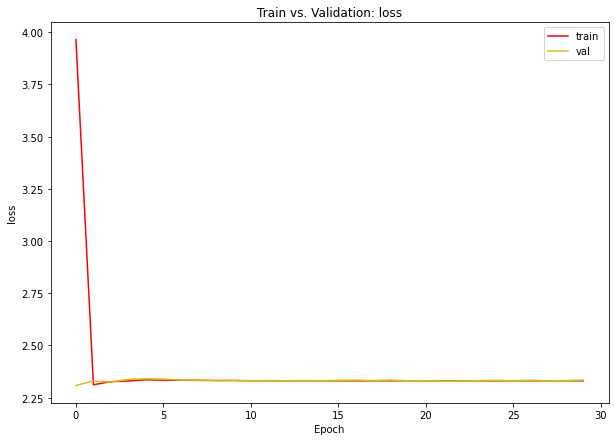

time: 188 ms (started: 2022-05-03 05:08:38 +00:00)


In [ ]:
plt.figure(figsize=(10, 7))
line_mse = plt.plot(range(0,EPOCHS), histDict['loss'], 'r')
line_crossEntropy = plt.plot(range(0,EPOCHS), histDict['val_loss'], '#cdc50a')
plt.title('Train vs. Validation: loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

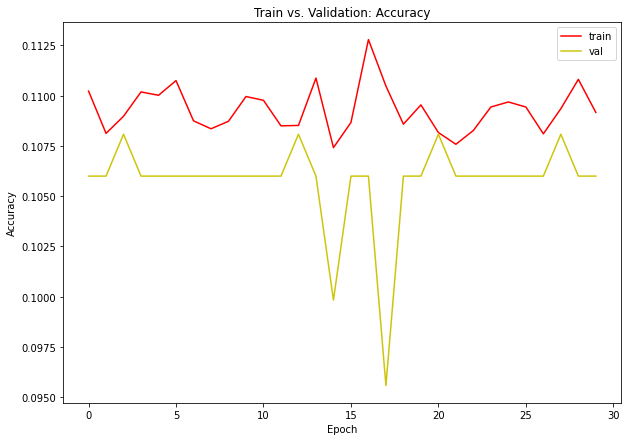

time: 179 ms (started: 2022-05-03 05:08:38 +00:00)


In [ ]:
plt.figure(figsize=(10, 7))
line_mse = plt.plot(range(0,EPOCHS), histDict['accuracy'], 'r')
line_crossEntropy = plt.plot(range(0,EPOCHS), histDict['val_accuracy'], '#cdc50a')
plt.title('Train vs. Validation: Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

## lambda = 0.1

In [ ]:
fact=0.1

time: 874 µs (started: 2022-05-03 05:08:38 +00:00)


In [ ]:
# helper function that fits the data with model.
resultsL_r_10 = generateModel_d(EPOCHS, fact, 0.025)

Epoch 1/30
750/750 [==============================] - 3s 4ms/step - loss: 1.7306 - accuracy: 0.6607 - val_loss: 1.3418 - val_accuracy: 0.7307
Epoch 2/30
750/750 [==============================] - 2s 3ms/step - loss: 1.3845 - accuracy: 0.6925 - val_loss: 1.3945 - val_accuracy: 0.6742
Epoch 3/30
750/750 [==============================] - 2s 3ms/step - loss: 1.3295 - accuracy: 0.7080 - val_loss: 1.4343 - val_accuracy: 0.6608
Epoch 4/30
750/750 [==============================] - 2s 3ms/step - loss: 1.3083 - accuracy: 0.7100 - val_loss: 1.3854 - val_accuracy: 0.6965
Epoch 5/30
750/750 [==============================] - 2s 3ms/step - loss: 1.3310 - accuracy: 0.7021 - val_loss: 1.2075 - val_accuracy: 0.7694
Epoch 6/30
750/750 [==============================] - 3s 3ms/step - loss: 1.2875 - accuracy: 0.7177 - val_loss: 1.1458 - val_accuracy: 0.7724
Epoch 7/30
750/750 [==============================] - 2s 3ms/step - loss: 1.2739 - accuracy: 0.7203 - val_loss: 1.2462 - val_accuracy: 0.7131
Epoch 

In [ ]:
histDict = resultsL_r_10.history

time: 724 µs (started: 2022-05-03 05:10:01 +00:00)


In [ ]:
def generatePlots(histDict):
  plt.figure(figsize=(10, 7))
  line_mse = plt.plot(range(0,EPOCHS), histDict['loss'], 'r')
  line_crossEntropy = plt.plot(range(0,EPOCHS), histDict['val_loss'], '#cdc50a')
  plt.title('Train vs. Validation: loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'])
  #plt.show()
  print('\n\n\n')
  plt.figure(figsize=(10, 7))
  line_mse = plt.plot(range(0,EPOCHS), histDict['accuracy'], 'r')
  line_crossEntropy = plt.plot(range(0,EPOCHS), histDict['val_accuracy'], '#cdc50a')
  plt.title('Train vs. Validation: Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'])
  plt.show()

time: 14.9 ms (started: 2022-05-03 05:10:01 +00:00)


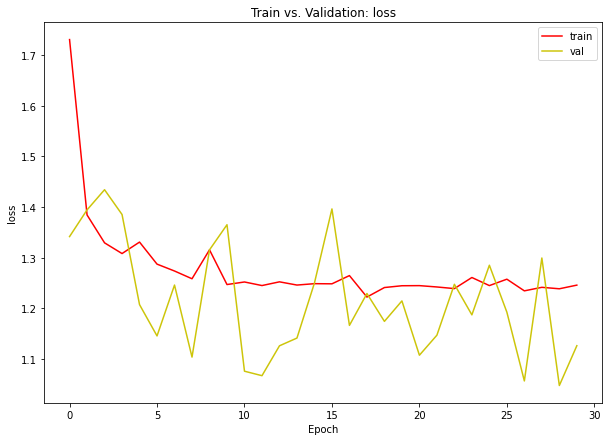

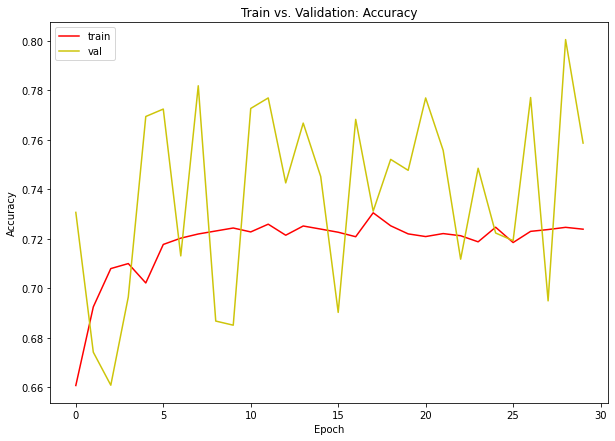

time: 359 ms (started: 2022-05-03 05:10:01 +00:00)


In [ ]:
# a helper function that plots the train vs. Validation loss and accuracy graphs
generatePlots(histDict)

## lambda = 0.01

In [ ]:
fact=0.01

time: 975 µs (started: 2022-05-03 05:10:01 +00:00)


In [ ]:
# helper function that fits the data with model.
resultsL_r_01 = generateModel_d(EPOCHS, fact, 0.025)

Epoch 1/30
750/750 [==============================] - 3s 3ms/step - loss: 1.0740 - accuracy: 0.8096 - val_loss: 0.8306 - val_accuracy: 0.8553
Epoch 2/30
750/750 [==============================] - 3s 3ms/step - loss: 0.8925 - accuracy: 0.8346 - val_loss: 0.8918 - val_accuracy: 0.8322
Epoch 3/30
750/750 [==============================] - 2s 3ms/step - loss: 0.8527 - accuracy: 0.8393 - val_loss: 0.7773 - val_accuracy: 0.8577
Epoch 4/30
750/750 [==============================] - 3s 3ms/step - loss: 0.8506 - accuracy: 0.8414 - val_loss: 0.8187 - val_accuracy: 0.8393
Epoch 5/30
750/750 [==============================] - 2s 3ms/step - loss: 0.8426 - accuracy: 0.8439 - val_loss: 0.7814 - val_accuracy: 0.8626
Epoch 6/30
750/750 [==============================] - 2s 3ms/step - loss: 0.8315 - accuracy: 0.8476 - val_loss: 0.8544 - val_accuracy: 0.8301
Epoch 7/30
750/750 [==============================] - 3s 3ms/step - loss: 0.8476 - accuracy: 0.8389 - val_loss: 0.8036 - val_accuracy: 0.8561
Epoch 

In [ ]:
histDict = resultsL_r_01.history

time: 1.03 ms (started: 2022-05-03 05:11:23 +00:00)


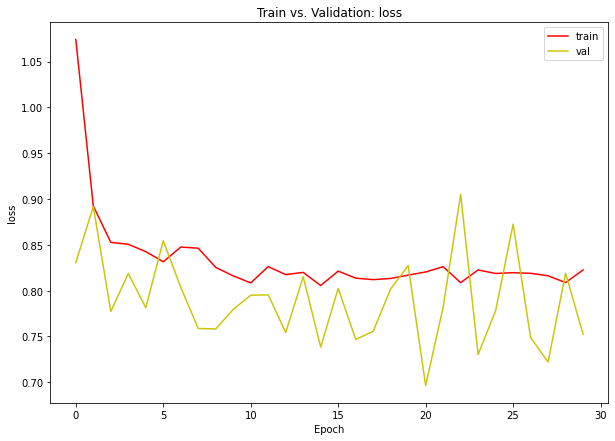

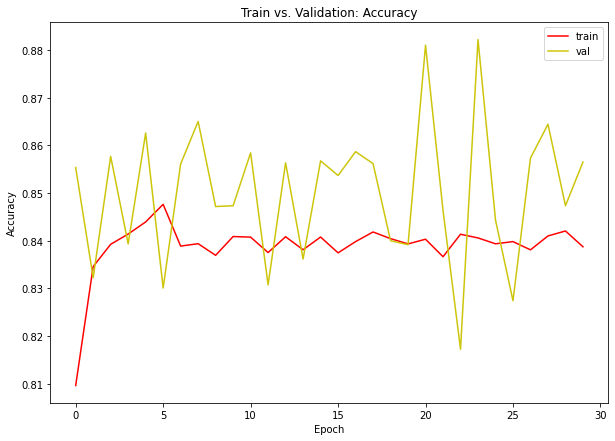

time: 346 ms (started: 2022-05-03 05:11:23 +00:00)


In [ ]:
# a helper function that plots the train vs. Validation loss and accuracy graphs
generatePlots(histDict)

## lambda = 5

In [ ]:
fact=5

time: 842 µs (started: 2022-05-03 05:11:24 +00:00)


In [ ]:
# helper function that fits the data with model.
resultsL_r_001 = generateModel_d(EPOCHS, fact, 0.025)

Epoch 1/30
750/750 [==============================] - 3s 3ms/step - loss: 10.6291 - accuracy: 0.1080 - val_loss: 2.3072 - val_accuracy: 0.1060
Epoch 2/30
750/750 [==============================] - 2s 3ms/step - loss: 2.3461 - accuracy: 0.1079 - val_loss: 2.4273 - val_accuracy: 0.1081
Epoch 3/30
750/750 [==============================] - 3s 3ms/step - loss: 2.4164 - accuracy: 0.1077 - val_loss: 2.4116 - val_accuracy: 0.1035
Epoch 4/30
750/750 [==============================] - 3s 3ms/step - loss: 2.4367 - accuracy: 0.1090 - val_loss: 2.4948 - val_accuracy: 0.0956
Epoch 5/30
750/750 [==============================] - 3s 3ms/step - loss: 2.4668 - accuracy: 0.1080 - val_loss: 2.5041 - val_accuracy: 0.1081
Epoch 6/30
750/750 [==============================] - 2s 3ms/step - loss: 2.4596 - accuracy: 0.1075 - val_loss: 2.4659 - val_accuracy: 0.1081
Epoch 7/30
750/750 [==============================] - 2s 3ms/step - loss: 2.4554 - accuracy: 0.1095 - val_loss: 2.4513 - val_accuracy: 0.1060
Epoch

In [ ]:
histDict = resultsL_r_001.history

time: 710 µs (started: 2022-05-03 05:12:46 +00:00)


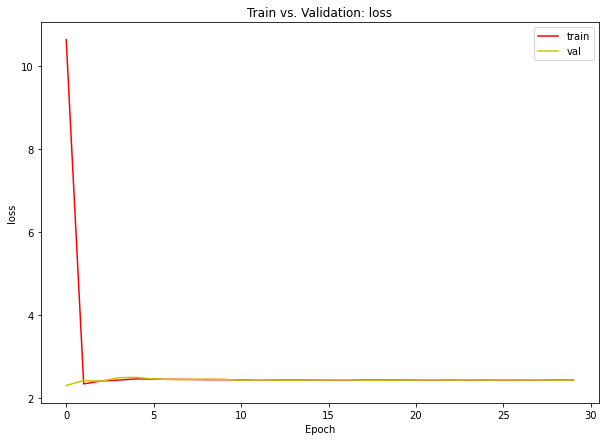

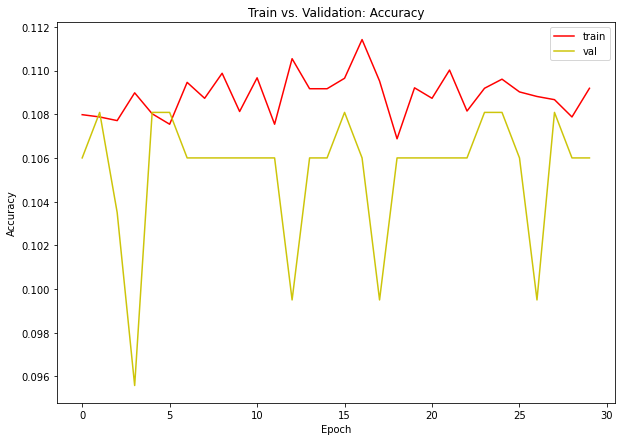

time: 339 ms (started: 2022-05-03 05:12:46 +00:00)


In [ ]:
# a helper function that plots the train vs. Validation loss and accuracy graphs
generatePlots(histDict)

# Dropout

## using a dropout rate of 20%

In [ ]:
# helper function that fits the data with model.
resultsL_do_20 = generateModel(5, 0.025, 0.2)

Epoch 1/30
750/750 [==============================] - 3s 3ms/step - loss: 10.6714 - accuracy: 0.1103 - val_loss: 2.3030 - val_accuracy: 0.1060
Epoch 2/30
750/750 [==============================] - 3s 3ms/step - loss: 2.3449 - accuracy: 0.1087 - val_loss: 2.4244 - val_accuracy: 0.0989
Epoch 3/30
750/750 [==============================] - 3s 3ms/step - loss: 2.4170 - accuracy: 0.1098 - val_loss: 2.4140 - val_accuracy: 0.1060
Epoch 4/30
750/750 [==============================] - 3s 3ms/step - loss: 2.4351 - accuracy: 0.1075 - val_loss: 2.4861 - val_accuracy: 0.1060
Epoch 5/30
750/750 [==============================] - 2s 3ms/step - loss: 2.4654 - accuracy: 0.1109 - val_loss: 2.4972 - val_accuracy: 0.1060
Epoch 6/30
750/750 [==============================] - 2s 3ms/step - loss: 2.4572 - accuracy: 0.1112 - val_loss: 2.4686 - val_accuracy: 0.1035
Epoch 7/30
750/750 [==============================] - 2s 3ms/step - loss: 2.4546 - accuracy: 0.1082 - val_loss: 2.4463 - val_accuracy: 0.1060
Epoch

In [ ]:
histDict = resultsL_do_20.history

time: 728 µs (started: 2022-05-03 05:14:00 +00:00)


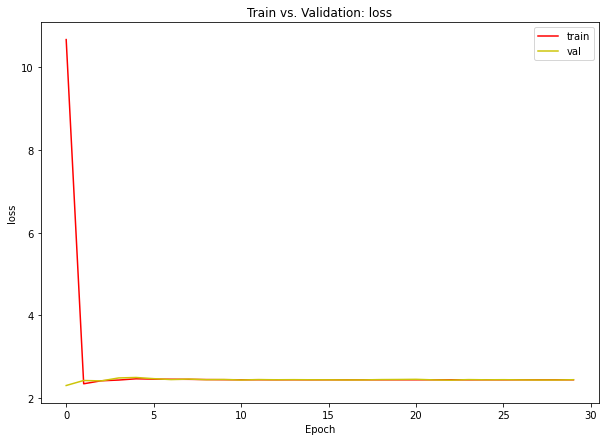

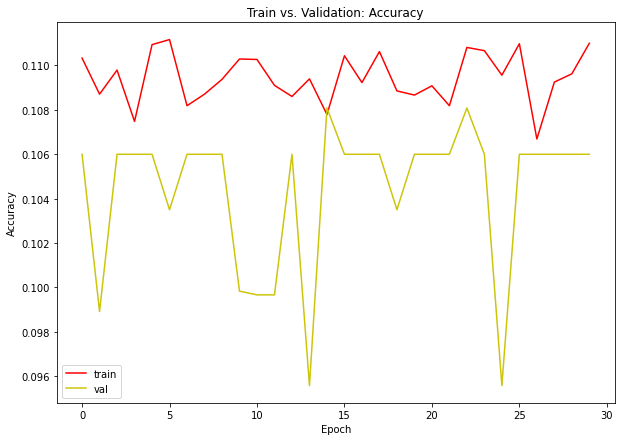

time: 332 ms (started: 2022-05-03 05:14:00 +00:00)


In [ ]:
# a helper function that plots the train vs. Validation loss and accuracy graphs
generatePlots(histDict)

## using a dropout rate of 30%

In [ ]:
# helper function that fits the data with model.
resultsL_do_30 = generateModel(0.01, 0.025, 0.3)

Epoch 1/30
750/750 [==============================] - 3s 4ms/step - loss: 1.1925 - accuracy: 0.7922 - val_loss: 0.9252 - val_accuracy: 0.8411
Epoch 2/30
750/750 [==============================] - 2s 3ms/step - loss: 1.0648 - accuracy: 0.8098 - val_loss: 0.9738 - val_accuracy: 0.8297
Epoch 3/30
750/750 [==============================] - 2s 3ms/step - loss: 1.0526 - accuracy: 0.8122 - val_loss: 0.9645 - val_accuracy: 0.8229
Epoch 4/30
750/750 [==============================] - 2s 3ms/step - loss: 1.0517 - accuracy: 0.8123 - val_loss: 1.0026 - val_accuracy: 0.8160
Epoch 5/30
750/750 [==============================] - 2s 3ms/step - loss: 1.0493 - accuracy: 0.8113 - val_loss: 0.9652 - val_accuracy: 0.8300
Epoch 6/30
750/750 [==============================] - 2s 3ms/step - loss: 1.0319 - accuracy: 0.8184 - val_loss: 0.9329 - val_accuracy: 0.8497
Epoch 7/30
750/750 [==============================] - 2s 3ms/step - loss: 1.0414 - accuracy: 0.8159 - val_loss: 0.9582 - val_accuracy: 0.8271
Epoch 

In [ ]:
histDict = resultsL_do_30.history

time: 1.29 ms (started: 2022-05-03 05:15:13 +00:00)


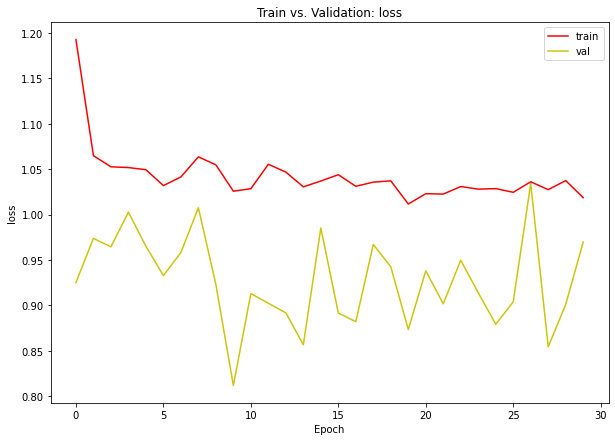

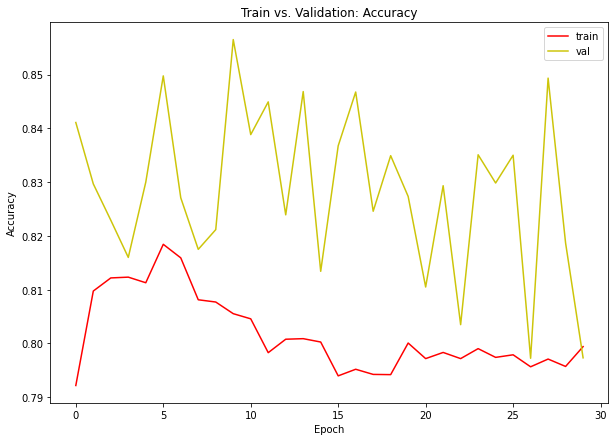

time: 350 ms (started: 2022-05-03 05:15:13 +00:00)


In [ ]:
# a helper function that plots the train vs. Validation loss and accuracy graphs
generatePlots(histDict)

# Using a systematic search for optimal parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV
# from keras.wrappers.scikit_learn import KerasClassifier

time: 188 ms (started: 2022-05-03 05:15:13 +00:00)


In [ ]:
# define a function that creates and returns a Keras sequential model:
def generate_Model(fact=0.01, e_t_a=0.002, dropout_rate=0.25):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten()) # input layer
  model.add(tf.keras.layers.Dense(128, kernel_regularizer=l2(fact), activation=tf.nn.relu)) # first hidden layer
  model.add(tf.keras.layers.Dense(128, kernel_regularizer=l2(fact), activation=tf.nn.relu)) # second hidden layer
  model.add(tf.keras.layers.Dropout(rate=dropout_rate))
  model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # this is like a probability distribution and that is why we are using softmax
  opt = tf.keras.optimizers.Adam(learning_rate=e_t_a)
  model.compile(optimizer=opt
              , loss='sparse_categorical_crossentropy'
              , metrics=['accuracy']
              )
  # let's fit the model using a 20% validation
  # resultsL = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=25, validation_split=0.2)

  return model

time: 6.82 ms (started: 2022-05-03 05:15:13 +00:00)


In [ ]:
#model = KerasClassifier(build_fn=generate_Model(), epochs=20)

time: 509 µs (started: 2022-05-03 05:15:13 +00:00)


In [ ]:
batch_size = [5, 25, 32, 64],
#weight_regulizer=  [0.0001, 0.1, 0.1],
#dropout=[0.2, 0.5]
             

time: 805 µs (started: 2022-05-03 05:15:13 +00:00)


In [ ]:
#parameters = dict(batch_size=batch_size, validation_split=[0.2])

time: 398 µs (started: 2022-05-03 05:15:13 +00:00)


In [ ]:
#grid = GridSearchCV(estimator=model, param_grid=parameters)

time: 451 µs (started: 2022-05-03 05:15:13 +00:00)


In [ ]:
#res = grid.fit(X_train, y_train)

time: 426 µs (started: 2022-05-03 05:15:13 +00:00)
